Demonstrate measuring the nominal delay between the input and output DDS blocks.

In [1]:
import importlib
from mkids import TopSoc
import numpy as np
import matplotlib.pyplot as plt
import Scan
soc = TopSoc()

In [2]:
fMixer = soc.fsIn/2/2
soc.set_mixer(fMixer)

1024.0

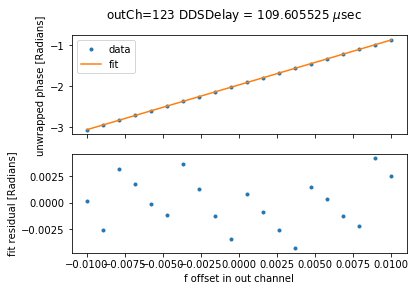

In [3]:
importlib.reload(Scan)
scan = Scan.Scan(soc)
outCh = 123
nominalDelay = scan.measureNominalDelay(outCh, decimation=2, doPlot=True)


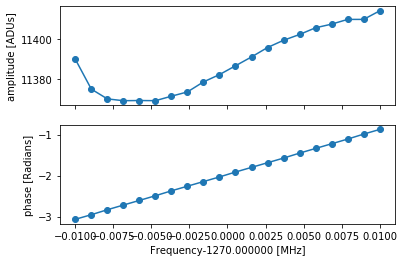

In [4]:
Scan.fscanPlot(scan.mndScan,0)

In [5]:
Scan.applyDelay(scan.mndScan, nominalDelay)

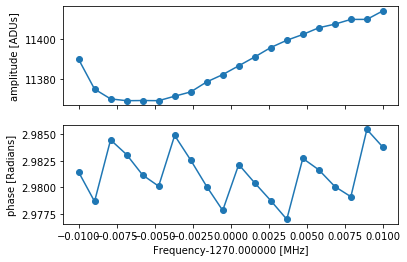

In [6]:
Scan.fscanPlot(scan.mndScan,0)